# Wielowymiarowy rozkład normalny

In [1]:
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from matplotlib import cm
from scipy.stats import multivariate_normal

# Narysujmy gęstość dwuwymiarowego rozkładu Normalnego

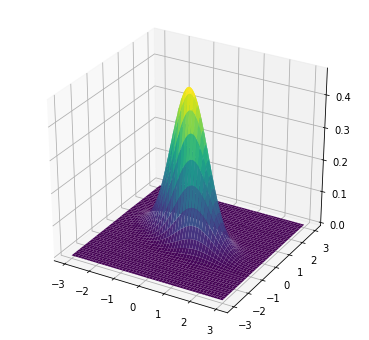

In [15]:
x = np.linspace(-3, 3, 600)
y = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y# Create a frozen RV object
mean = np.array([0, 0])
cov  = np.array([[ 0.6744121, -0.16938146], [-0.16938146, 0.21243464]])
rv = multivariate_normal(mean,cov)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
_ = ax.plot_surface(X, Y, rv.pdf(pos), linewidth=0.2, cmap=cm.viridis)
plt.show()

# Narysujmy kontury gęstości dwuwymiarowego rozkładu Normalnego

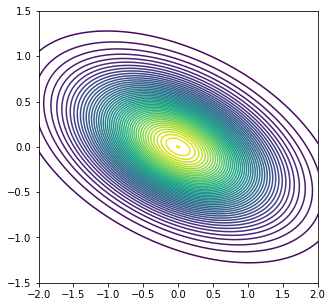

In [16]:
x = np.linspace(-3, 3, 600)
y = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y# Create a frozen RV object
mean = np.array([0, 0])
cov  = np.array([[ 0.6744121, -0.16938146], [-0.16938146, 0.21243464]])
rv = multivariate_normal(mean,cov)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.contour(X, Y, rv.pdf(pos), cmap=cm.viridis, levels=50)
ax.set_xlim([-2, 2])
ax.set_ylim([-1.5, 1.5])
plt.show()

# Wylosujmy próbkę z dwuwymiarowego rozkładu Normalnego

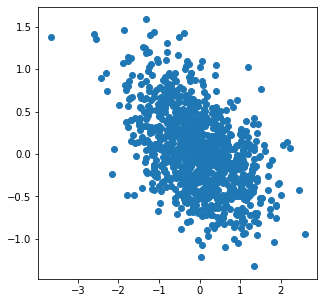

In [17]:
mean = np.array([0, 0])
cov  = np.array([[ 0.6744121, -0.16938146], [-0.16938146, 0.21243464]])
x,y = np.random.multivariate_normal(mean, cov, 1000).T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(x, y); 
plt.show()

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [18]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75, 5.50]])
X1_rv = multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

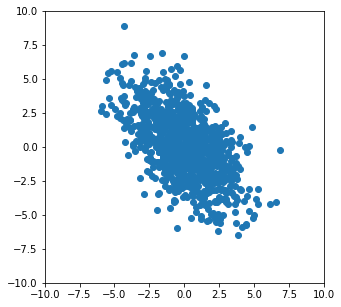

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [20]:
means = X.mean(axis=0)
cov = np.cov(X.T)

In [21]:
print(means, cov, sep="\n"*2)

[0.0201939  0.03553907]

[[ 4.32357159 -2.80027494]
 [-2.80027494  5.75104587]]


# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [22]:
X2_rv = multivariate_normal(means, cov)
P = X2_rv.rvs(1000)

In [23]:
x = np.linspace(-10, 10, 600)
y = np.linspace(-10, 10, 600)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y

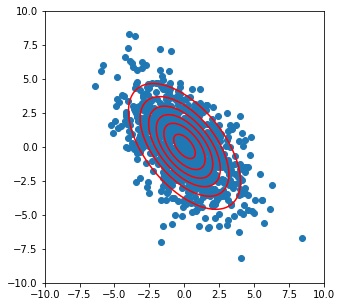

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(P[:, 0], P[:, 1])
ax.contour(X, Y, X2_rv.pdf(pos), colors='r', levels=6)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[[ 0.0201939   0.03553907  3.38798311 -4.59360493]
 [ 0.0201939   0.03553907 -2.33104251 -1.71924508]]


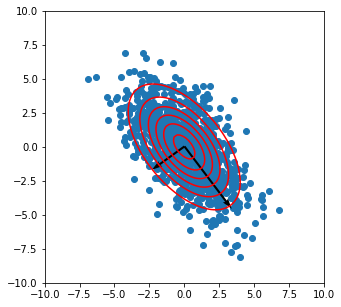

In [25]:
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
pos = np.dstack((x, y))

mean = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75, 5.50]])

rv = multivariate_normal(mean, cov)
X, Y = rv.rvs(1000).T
z = rv.pdf(pos)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X, Y)
ax.contour(x, y, z, colors='r', levels=6)

e_values, e_vectors = np.linalg.eig(np.cov(X, Y));
#plot eigen vectors
soa = np.array([[means[0], means[1], 2 * np.sqrt(e_values[1]) * e_vectors[0, 1], 2 * np.sqrt(e_values[1]) * e_vectors[1, 1]],
                [means[0], means[1], 2 * np.sqrt(e_values[0]) * e_vectors[0, 0], 2 * np.sqrt(e_values[0]) * e_vectors[1, 0]]])
print(soa)
X1, Y1, U1, V1 = zip(*soa)
ax.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1)


ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[[ 0.5         0.5        -0.32504321 -0.35309798]
 [ 0.5         0.5        -0.33048046  0.30422273]]


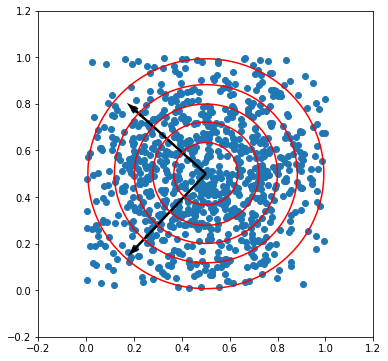

In [26]:
x, y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
pos = np.dstack((x,y))

mean = np.array([0.5, 0.5])
cov = np.array([[0.07, 0], [0, 0.07]])

rv = multivariate_normal(mean, cov)
X, Y = rv.rvs(1000).T

square = np.array(list(filter(lambda x: x[0]>0 and x[0]<1 and x[1]>0 and x[1]<1, list(zip(X, Y)))))
X = square[:, 0]
Y = square[:, 1]

z = rv.pdf(pos)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(X, Y)
ax.contour(x, y, z, colors='r', levels=6)

e_values, e_vectors = np.linalg.eig(np.cov(X, Y));
#plot eigen vectors
soa = np.array([[mean[0], mean[1], 2 * np.sqrt(e_values[1]) * e_vectors[0, 1], 2 * np.sqrt(e_values[1]) * e_vectors[1, 1]],
                [mean[0], mean[1], 2 * np.sqrt(e_values[0]) * e_vectors[0, 0], 2 * np.sqrt(e_values[0]) * e_vectors[1, 0]]] )
print(soa)
X1, Y1, U1, V1 = zip(*soa)
ax.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1)

ax.set_xlim([-0.2, 1.2])
ax.set_ylim([-0.2, 1.2])
plt.show()
